In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


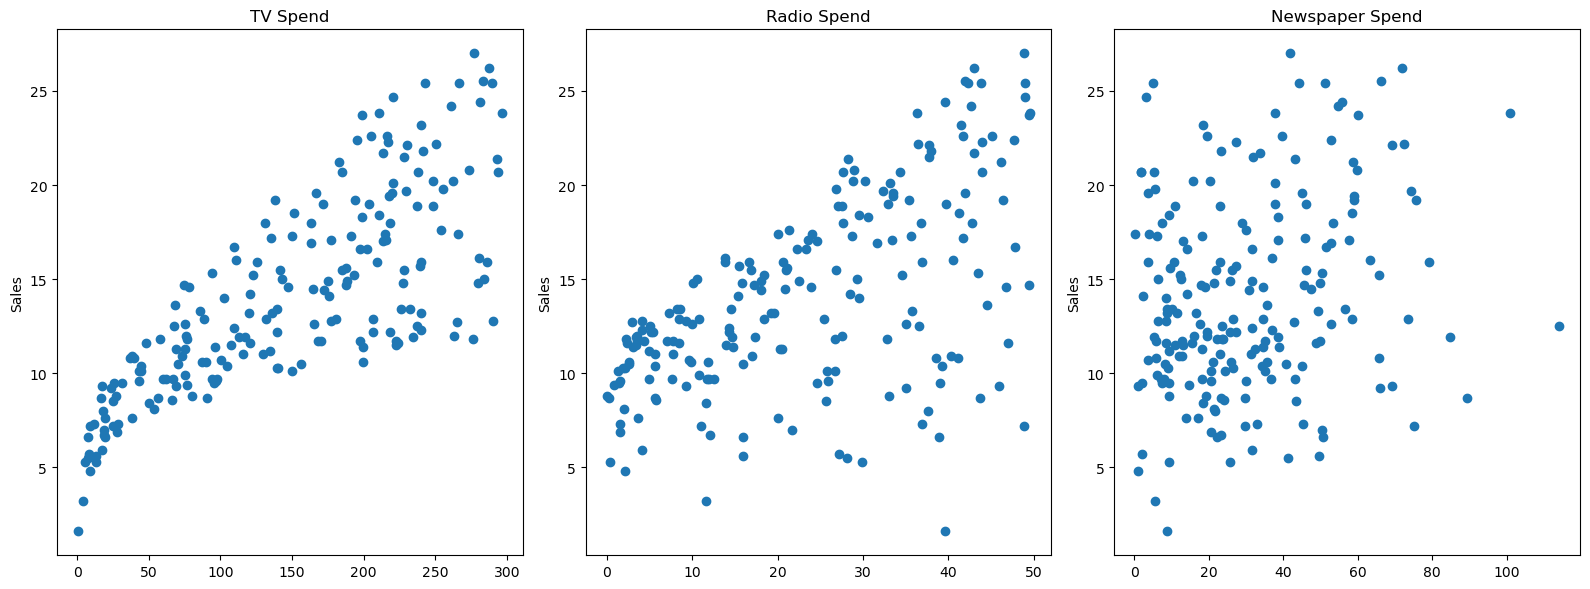

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

/Users/brandonkwamou/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


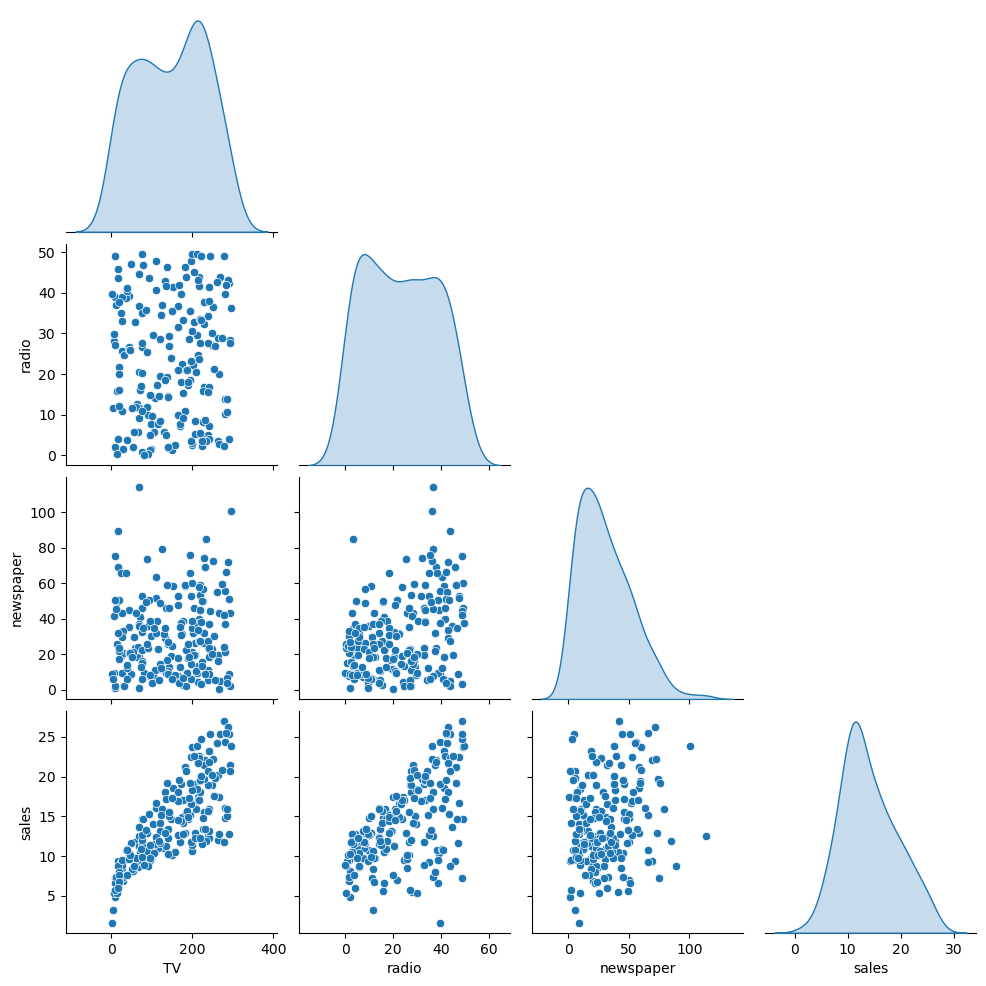

In [38]:
sns.pairplot(df, corner=True,diag_kind='kde')

In [6]:
X = df.drop("sales",axis=1)

In [7]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [8]:
y = df['sales']

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [13]:
len(df)

200

In [14]:
len(X_train)

140

In [15]:
len(X_test)

60

In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
# help(LinearRegression)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
test_preds = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

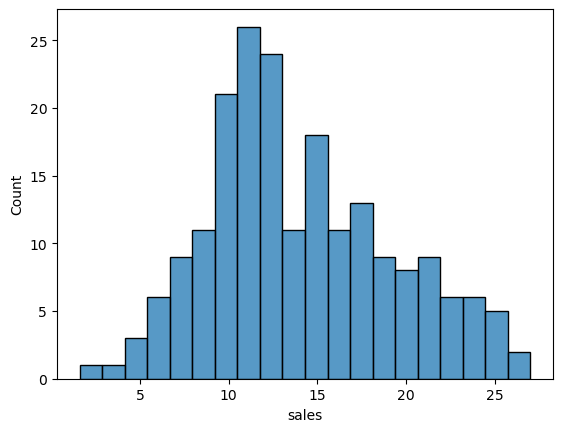

In [26]:
sns.histplot(df, x='sales', bins=20)

In [27]:
# MAE
mean_absolute_error(y_test, test_preds)

1.2137457736144805

In [28]:
# MSE
mean_squared_error(y_test, test_preds)

2.2987166978863782

In [29]:
# RMSE
np.sqrt(mean_squared_error(y_test, test_preds))

1.516151937599388

# Residual

In [30]:
test_residuals = y_test - test_preds

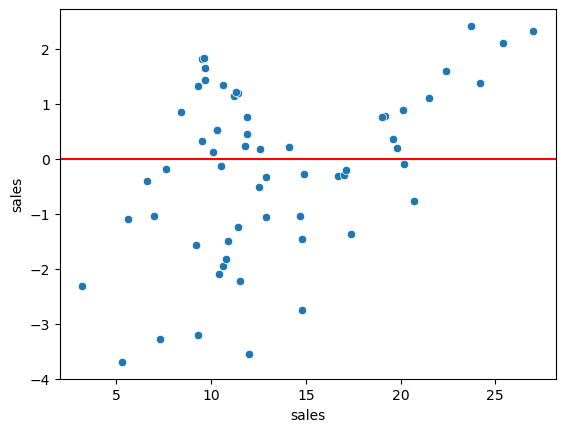

In [33]:
sns.scatterplot(y=test_residuals, x=y_test);
plt.axhline(0, color="red")

/Users/brandonkwamou/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


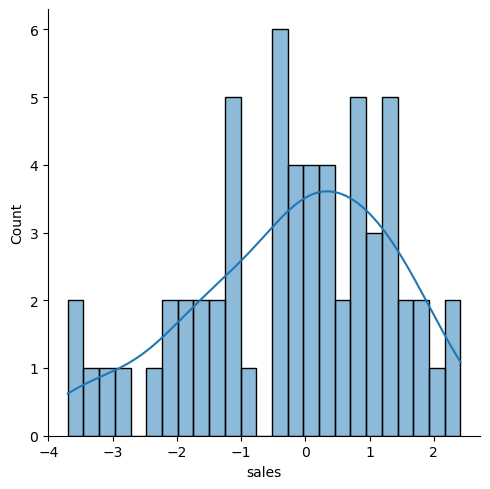

In [34]:
sns.displot(test_residuals, bins=25, kde=True)

In [35]:
import scipy as sp

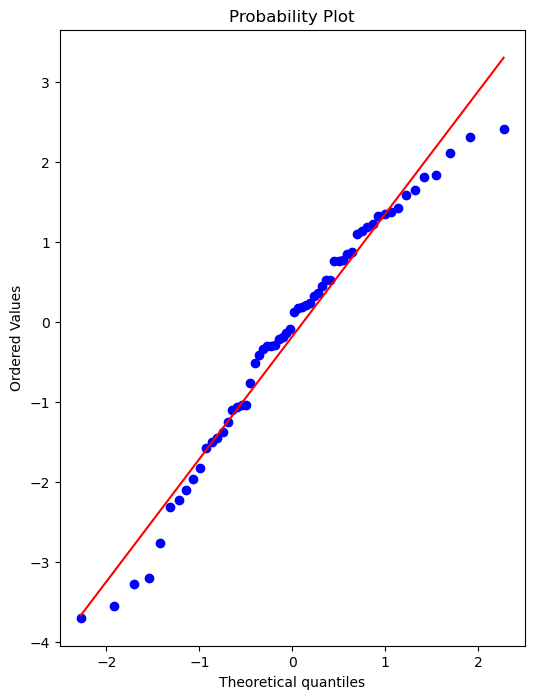

In [37]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(X,y)

LinearRegression()

In [41]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [42]:
# coeficient of each column
# TV and radio are positive so it increase sales
# newspaper is negative units so it go to even decrease sales or you just lose money by using newspaper for ad
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [43]:
y_hat = final_model.predict(X)

### comparing sales vs prediction

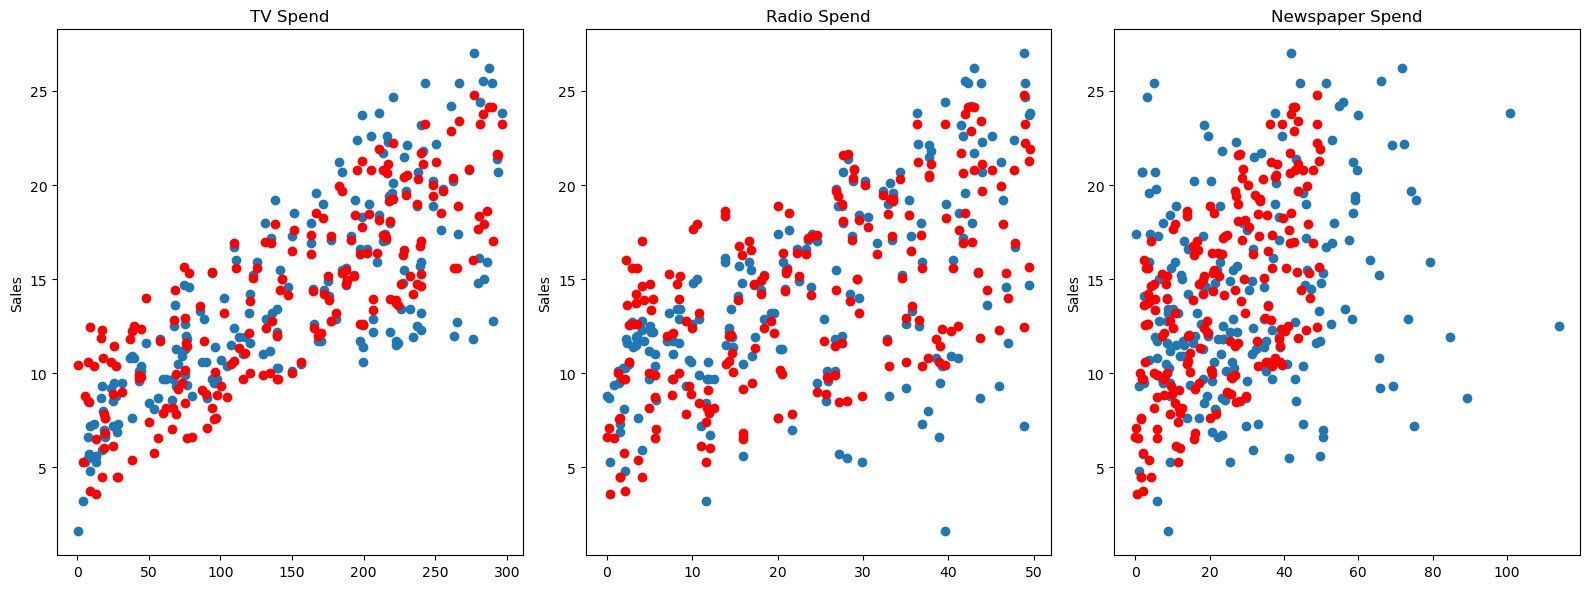

In [44]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

# Saving and deploying the model

In [45]:
from joblib import dump, load

In [ ]:
dump(final_model, 'final_sales_model.joblib')

In [47]:
loaded_model = load('final_sales_model.joblib')

In [48]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
X.shape

(200, 3)

In [50]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149, 22, 12]]

In [51]:
loaded_model.predict(campaign)

array([13.893032])